In [2]:
import os
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
print(ROOT)

/home/saisampathkedari/MonteCarlo-Statistical-Methods


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataclasses 

import scipy.stats as scistats

from stochastic_processes.brownian_motion import *

## Brownian Motion as the Scaling Limit of a Simple Random Walk

### Simple Random Walk

Let $\{X_k\}_{k\ge 1}$ be i.i.d. random variables defined by  
$$
X_k =
\begin{cases}
+1 & \text{with prob. } \tfrac12,\\[4pt]
-1 & \text{with prob. } \tfrac12.
\end{cases}
$$

Define the random walk  
$$
S_0 = 0,
\qquad
S_n = \sum_{k=1}^n X_k.
$$

Basic properties:  
$$
\mathbb{E}[S_n] = 0,
\qquad
\operatorname{Var}(S_n) = n.
$$

Intuition:  
after $n$ steps, the walker experiences $n$ independent unit kicks, so its typical spread scales like  
$$
|S_n| \approx \sqrt{n},
$$
the first hint of diffusive behavior.

---

### Diffusive Scaling

To obtain a continuous-time limit, we compress $n$ steps into $[0,1]$ by setting  
$$
t = \frac{k}{n},
$$
and scale the height by $\sqrt{n}$ to keep fluctuations finite:  
$$
W_n(t) = \frac{ S_{\lfloor nt\rfloor} }{ \sqrt{n} }.
$$

Intuition:

- Time scaling makes the walk dense in the interval.
- Height scaling keeps variance at time $t$ equal to $t$ (not $nt$).
- This creates a non-exploding, non-degenerate limit.


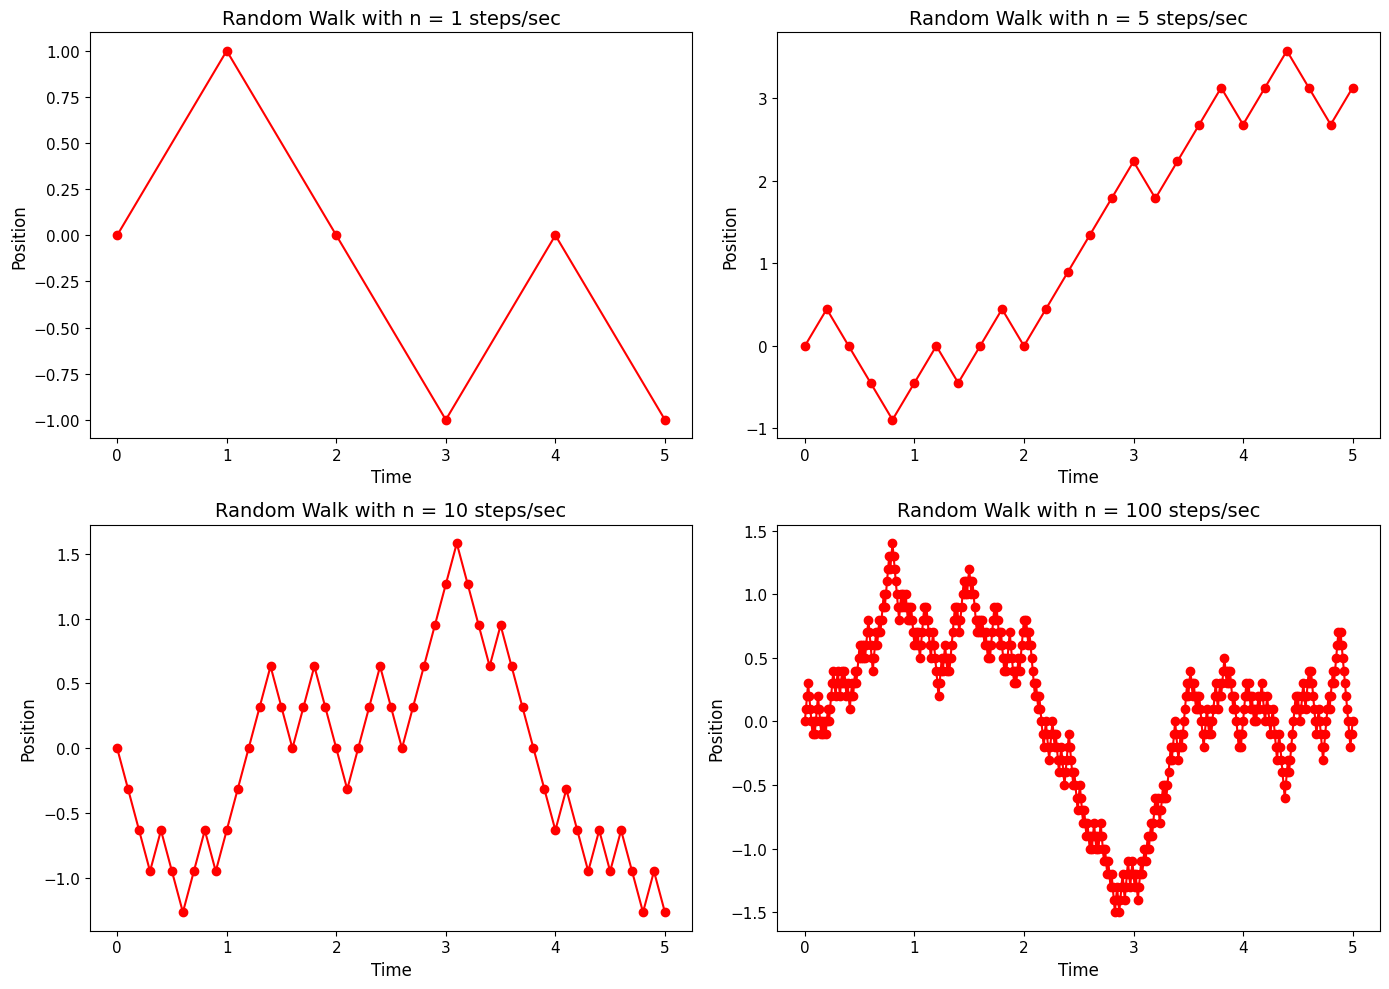

In [3]:
fig, axs = plt.subplots(2,2, figsize=(14,10))

T = 5  # time = 5

# Figure 1
n = 1
num_steps = n * T
tplot = np.linspace(0, T, num_steps+1)
steps = generate_random_walk(num_steps, n)
axs[0,0].plot(tplot, steps, marker='o', color='red', linewidth=1.5)
axs[0,0].set_title(f"Random Walk with n = {n} steps/sec", fontsize=14)
axs[0,0].set_xlabel("Time", fontsize=12)
axs[0,0].set_ylabel("Position", fontsize=12)
axs[0,0].tick_params(labelsize=11)

# Figure 2
n = 5
num_steps = n * T
tplot = np.linspace(0, T, num_steps+1)
steps = generate_random_walk(num_steps, n)
axs[0,1].plot(tplot, steps, marker='o', color='red', linewidth=1.5)
axs[0,1].set_title(f"Random Walk with n = {n} steps/sec", fontsize=14)
axs[0,1].set_xlabel("Time", fontsize=12)
axs[0,1].set_ylabel("Position", fontsize=12)
axs[0,1].tick_params(labelsize=11)

# Figure 3
n = 10
num_steps = n * T
tplot = np.linspace(0, T, num_steps+1)
steps = generate_random_walk(num_steps, n)
axs[1,0].plot(tplot, steps, marker='o', color='red', linewidth=1.5)
axs[1,0].set_title(f"Random Walk with n = {n} steps/sec", fontsize=14)
axs[1,0].set_xlabel("Time", fontsize=12)
axs[1,0].set_ylabel("Position", fontsize=12)
axs[1,0].tick_params(labelsize=11)

# Figure 4
n = 100
num_steps = n * T
tplot = np.linspace(0, T, num_steps+1)
steps = generate_random_walk(num_steps, n)
axs[1,1].plot(tplot, steps, marker='o', color='red', linewidth=1.5)
axs[1,1].set_title(f"Random Walk with n = {n} steps/sec", fontsize=14)
axs[1,1].set_xlabel("Time", fontsize=12)
axs[1,1].set_ylabel("Position", fontsize=12)
axs[1,1].tick_params(labelsize=11)

plt.tight_layout()
save_path_1 = os.path.join(ROOT, "images/stochastic_processes/DiffusiveScale.png")
plt.savefig(
    save_path_1,
    dpi=300,
    bbox_inches='tight'
)
plt.show()


### Increment Structure

Fix $0\le s < t \le 1$. Then  
$$
W_n(t) - W_n(s)
=
\frac{1}{\sqrt{n}}
\sum_{j=\lfloor ns\rfloor+1}^{\lfloor nt\rfloor} X_j.
$$

#### Independent increments

Since sums over disjoint index sets involve independent $X_j$,  
$$
W_n(t)-W_n(s) \quad\text{is independent of}\quad
W_n(u)-W_n(v)
$$
whenever $(s,t]$ and $(v,u]$ do not overlap.

#### Mean and variance

$$
\mathbb{E}[W_n(t)-W_n(s)] = 0,
$$

$$
\operatorname{Var}(W_n(t)-W_n(s))
=
\frac{\lfloor nt\rfloor - \lfloor ns\rfloor}{n}
\longrightarrow t-s.
$$

#### Gaussian limit

By the central limit theorem,
$$
W_n(t)-W_n(s)
\Longrightarrow 
\mathcal{N}(0,\, t-s).
$$

Thus the limiting increments are Gaussian with variance equal to elapsed time.

---

### Limit Covariance

For $s\le t$,  
$$
\mathbb{E}[W_n(s)W_n(t)]
=
\frac{1}{n}\mathbb{E}\big[ S_{\lfloor ns\rfloor} \, S_{\lfloor nt\rfloor} \big]
=
\frac{\lfloor ns\rfloor}{n}
\longrightarrow s.
$$

Hence the limiting covariance function is  
$$
\mathbb{E}[B(s)B(t)] = \min(s,t).
$$

This identifies $B(t)$ as standard Brownian motion.

---

### Continuous Brownian Motion via Euler Simulation

To visualize the limit, we simulate Brownian motion directly using  
$$
W(t+\Delta t) - W(t) \sim \mathcal{N}(0,\Delta t)
= \sqrt{\Delta t}\, Z_k,
\qquad Z_k \sim \mathcal{N}(0,1).
$$

The sample path is built via cumulative summation.


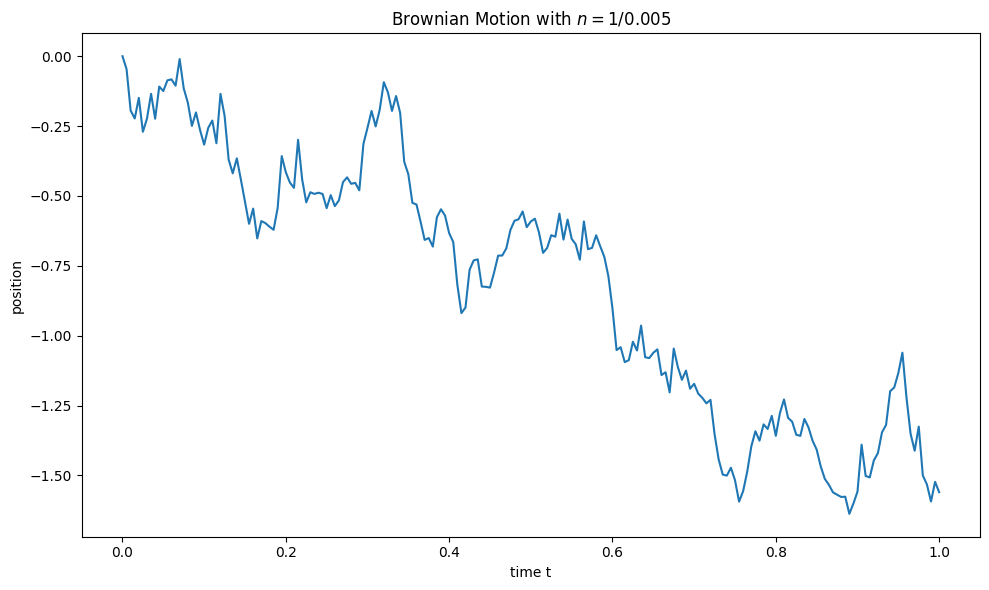

In [4]:
tfinal = 1.0 #final time
dt = 0.005
tspan = np.arange(0, tfinal+dt, dt) # 
bm = brownian_motion_simulate(tfinal, dt)

plt.figure(figsize=(10,6))
plt.plot(tspan, bm)
plt.xlabel("time t")
plt.ylabel("position")
plt.title(f"Brownian Motion with $ n = 1/{dt}$")

plt.tight_layout()
save_path_2 = os.path.join(ROOT, "images/stochastic_processes/sigle_BM.png")
plt.savefig(
    save_path_2,
    dpi=300,
    bbox_inches='tight'
)
plt.show()

### Variance Growth: $\operatorname{Var}(B(t)) = t$

Since Brownian increments satisfy  
$$
B(t) - B(s) \sim \mathcal{N}(0, t-s),
$$
we have  
$$
\operatorname{Var}(B(t)) = t.
$$

The variance cone $\pm \sqrt{t}$ captures two standard deviations.


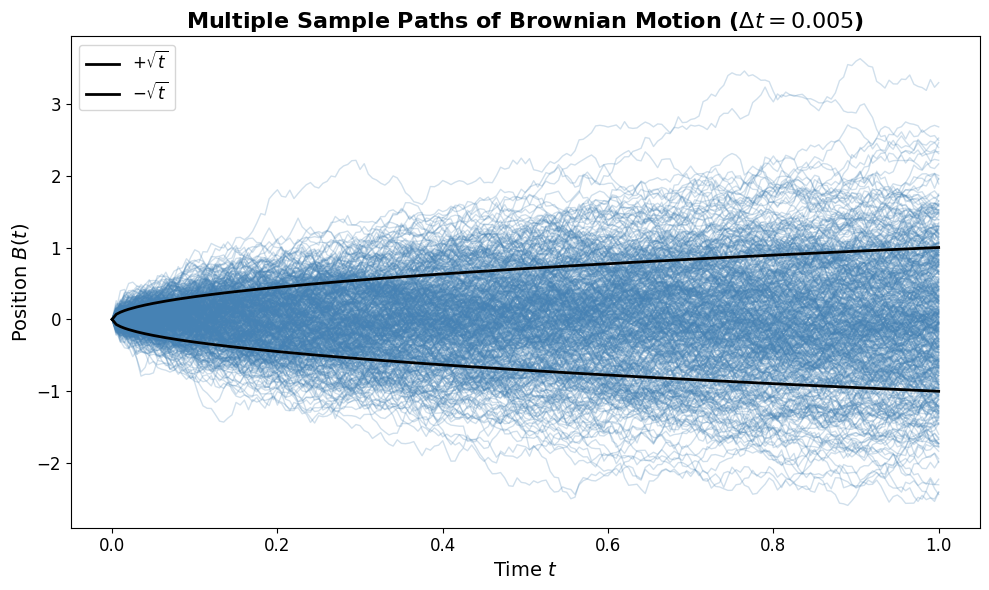

In [5]:
number_of_paths = 500

tfinal = 1.0 #final time
dt = 0.005
tspan = np.arange(0, tfinal+dt, dt) #
positive_dt_sqrt = np.sqrt(tspan)
negative_dt_sqrt = -1*np.sqrt(tspan)
samples = np.zeros((number_of_paths,len(tspan)))

plt.figure(figsize=(10,6))

for i in range(number_of_paths):
    samples[i,:] = brownian_motion_simulate(tfinal, dt)
    plt.plot(tspan, samples[i,:], color='steelblue', alpha=0.25, linewidth=1.0)

plt.plot(tspan, positive_dt_sqrt, color="black", linewidth=2, label=r"$+\sqrt{t}$")
plt.plot(tspan, negative_dt_sqrt, color="black", linewidth=2, label=r"$-\sqrt{t}$")
plt.xlabel(r"Time $t$", fontsize=14)
plt.ylabel(r"Position $B(t)$", fontsize=14)
plt.title(r"Multiple Sample Paths of Brownian Motion ($\Delta t = %.3f$)" % dt,
          fontsize=16, fontweight='bold')
plt.tick_params(labelsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()
save_path_3 = os.path.join(ROOT, "images/stochastic_processes/multiple_BM.png")
plt.savefig(
    save_path_3,
    dpi=300,
    bbox_inches='tight'
)
plt.show()


### Gaussian Marginals

For each fixed $t$,  
$$
B(t) \sim \mathcal{N}(0,t).
$$

We verify this by histogramming the simulated values at two times $t_1 < t_2$.


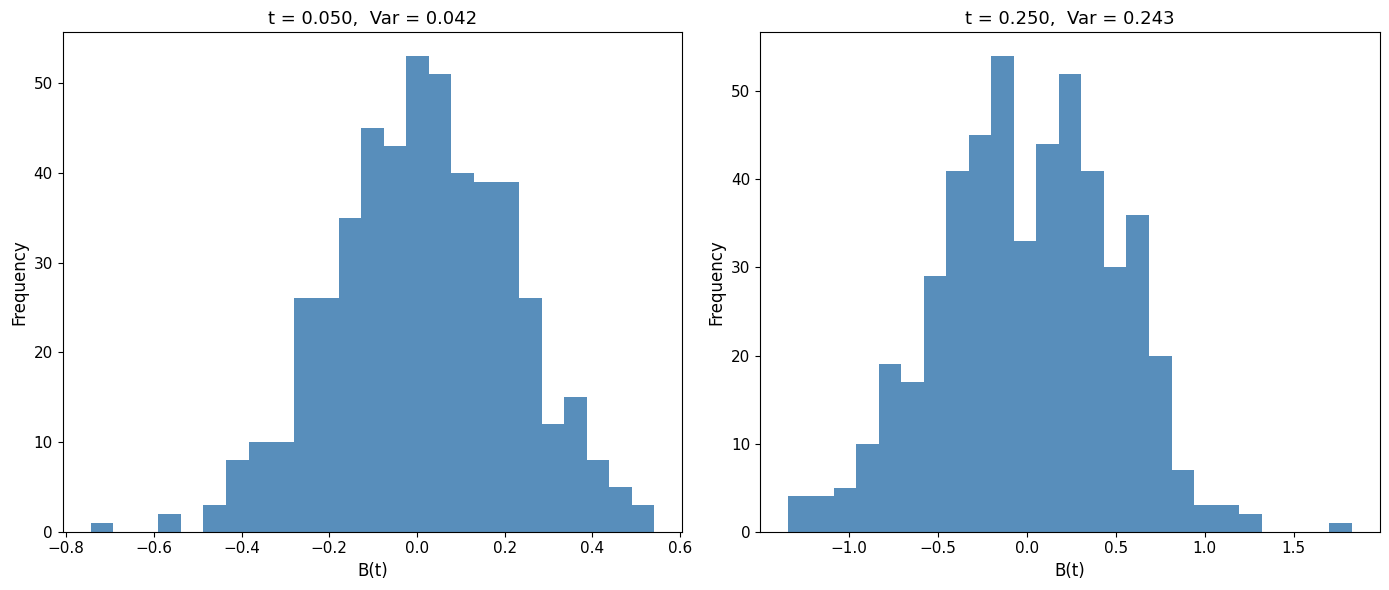

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

bins = 25  # simple, minimal number of bins

# ---- Histogram at time index 10 ----
var_t1 = np.var(samples[:, 10])
time_t1 = tspan[10]

ax1.hist(samples[:, 10], bins=bins, color="steelblue", alpha=0.9)
ax1.set_title(f"t = {time_t1:.3f},  Var = {var_t1:.3f}", fontsize=13)
ax1.set_xlabel("B(t)", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.tick_params(labelsize=11)

# ---- Histogram at time index 50 ----
var_t2 = np.var(samples[:, 50])
time_t2 = tspan[50]

ax2.hist(samples[:, 50], bins=bins, color="steelblue", alpha=0.9)
ax2.set_title(f"t = {time_t2:.3f},  Var = {var_t2:.3f}", fontsize=13)
ax2.set_xlabel("B(t)", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)
ax2.tick_params(labelsize=11)

plt.tight_layout()
save_path_4 = os.path.join(ROOT, "images/stochastic_processes/var_hist.png")
plt.savefig(
    save_path_4,
    dpi=300,
    bbox_inches='tight'
)
plt.show()


### Stationary Increments

For Brownian motion,
$$
B(t+\Delta)-B(t) \sim \mathcal{N}(0,\Delta),
$$
independent of $t$.

Simulation verifies that all increments of length $\Delta$ have the same empirical distribution.

---

### Self-Similarity

Brownian motion satisfies  
$$
B(ct) \;\overset{d}{=}\; \sqrt{c}\, B(t).
$$

This can be confirmed in simulation by comparing $B(2t)/\sqrt{2}$ with $B(t)$.

---

### Continuity and Roughness

$B(t)$ is continuous everywhere but almost surely nowhere differentiable.  
As $\Delta t \to 0$, increments remain of size  
$$
\sqrt{\Delta t},
$$
too large relative to $\Delta t$ for a derivative to exist.

---

### Summary of Convergence

The scaled random walk $W_n(t)$ converges in distribution to Brownian motion $B(t)$ because:

- increments become independent,
- increments converge to Gaussian,
- variance and covariance converge to $t-s$ and $\min(s,t)$,
- the sequence is tight, implying continuous limiting paths.

Therefore  
$$
W_n \Longrightarrow B.
$$

---

### Relevance to Robotics and Bayesian Filtering

Brownian motion models the accumulation of process noise over time.  
In continuous dynamics:
$$
dx = f(x,u)\, dt + \Sigma\, dB_t,
$$

and discrete-time filters (KF, EKF, UKF, PF) use the approximation:
$$
w_k \sim \mathcal{N}(0,\, Q \Delta t),
$$
coming directly from Brownian increments.

Thus Brownian motion provides the mathematically correct foundation for uncertainty growth in dynamical systems.
